# Iris classification

Classify flowers based on pedal and sepal widths and heights. The "Hello world" of ML. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Structure:<br>
1) Load data
2) EDA
3) Data preprocessing
4) Train and test models
    - Logistic regression
    - KNN
    - Decision tree
    - SVM
    - Random forest

## 1) Load data

Load data and import packages

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt


# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix 
# from sklearn.metrics import classification_report

df = pd.read_csv('IRIS.csv')

## 2) Explanatory data analysis (EDA)

2.1) Overview and descriptive statistics<br>
2.2) Feature assessment and visualisation<br>
2.3) Data quality evaluation<br>

### 2.1) Overview and descriptive statistics

In [12]:
print(f'\n\n______________________________________________\n\n')
print(f'Shape:\n\n{df.shape}')
print(f'\n\n______________________________________________\n\n')
print(f'Value counts:\n\n{df.species.value_counts()}')
print(f'\n\n______________________________________________\n\n')
print(f'Describe:\n\n{df.describe()}')
print(f'\n\n______________________________________________\n\n')
print(f'Missing data (nan values):\n\n{df.isnull().sum()}')
print(f'\n\n______________________________________________\n\n')
print(f'Head:\n\n{df.head()}')
print(f'\n\n______________________________________________\n\n')



______________________________________________


Shape:

(150, 5)


______________________________________________


Value counts:

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


______________________________________________


Describe:

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


______________________________________________


Missing data (nan values):

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species      

## 2.2) Feature assessment and visualisation

Univariate analyis (individual characteristics of the features)<br>
Multivariate analysis (relationship of features)

<Figure size 640x480 with 0 Axes>

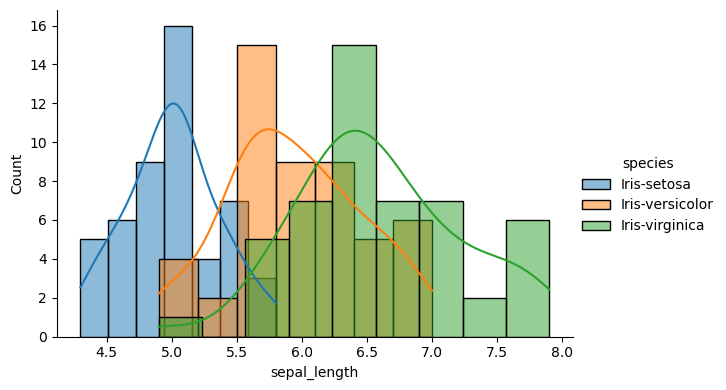

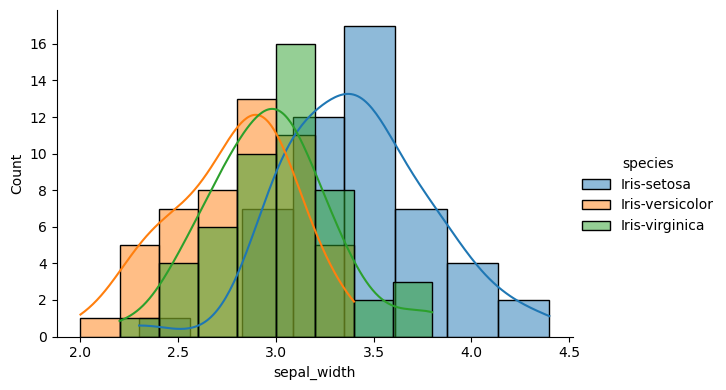

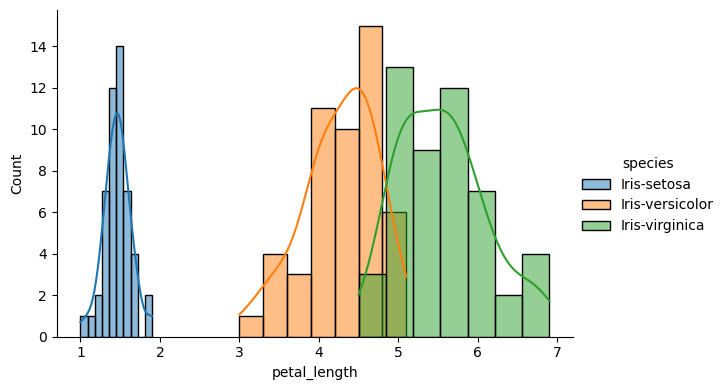

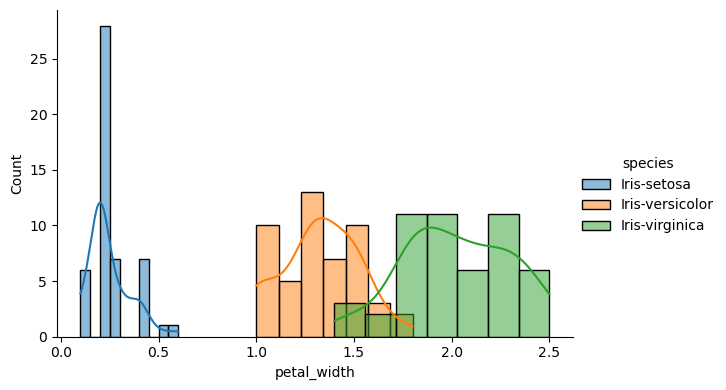

In [24]:

features = df.columns[:-1].values

plt.figure()
for f in features:
    g = sns.FacetGrid(df, hue='species', height=4, aspect=1.5)
    g.map(sns.histplot, f, kde=True)
    g.add_legend()

<Figure size 640x480 with 0 Axes>

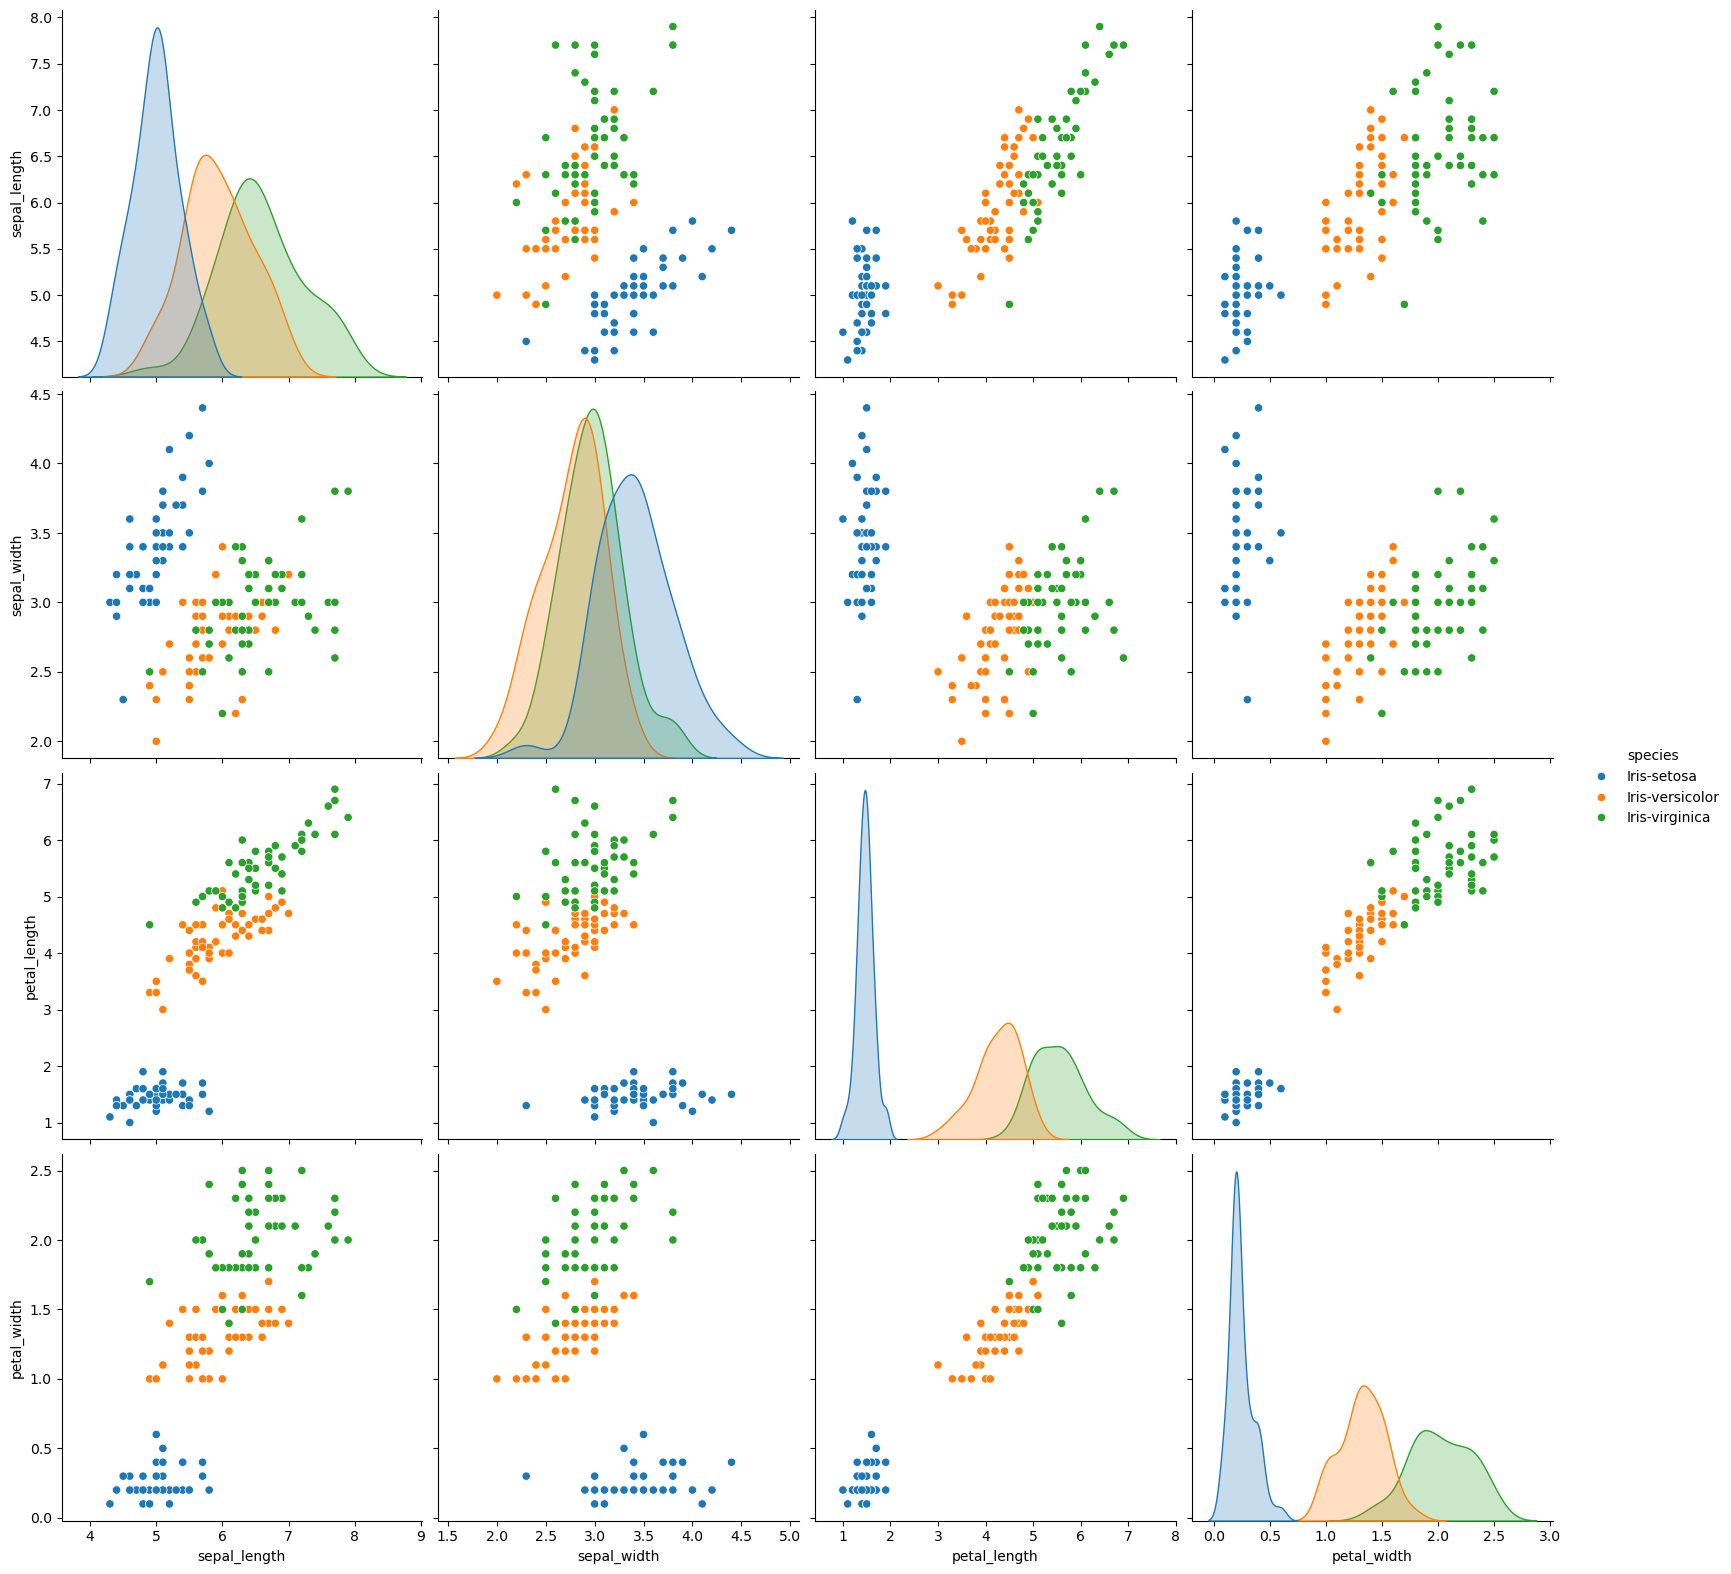

In [25]:
plt.figure()
sns.pairplot(df, hue='species', height=4, aspect=1)

<Axes: >

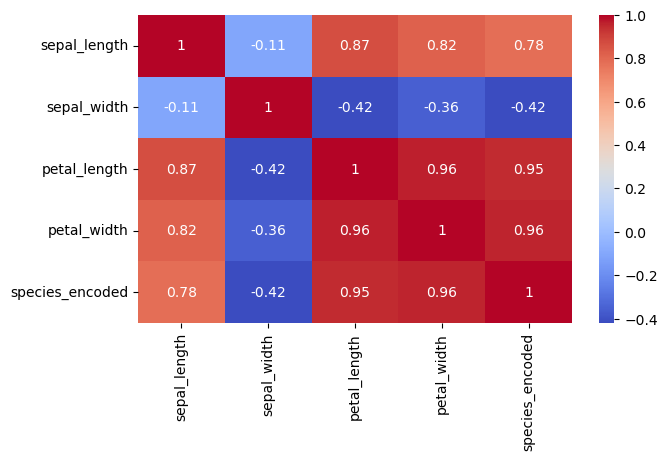

In [28]:
from sklearn import preprocessing 

# Encode categorical target label as numerical for correlation matrix
label_encoder = preprocessing.LabelEncoder() 
df['species_encoded']= label_encoder.fit_transform(df['species'])

plt.figure(figsize=(7,4)) 
sns.heatmap(df.loc[:, df.columns != 'species'].corr(), annot=True, cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [29]:
from ydata_quality import DataQuality
dq = DataQuality(df)

ModuleNotFoundError: No module named 'ydata_quality'

In [ ]:
import pandas

